# Week 02, Part 3: AVOID text

See lecture slides for more info about how this dataset was collected.

### Topics:
 1. Read in text data
 1. Explore text data


Resize plots:

In [15]:
require(repr)
options(repr.plot.width=10, repr.plot.height=4)

Loading required package: repr



## 1. Read in AVOID data

There are a few packages that are helpful for reading in text data, we'll install one:

In [16]:
#install.packages("readtext") # only need to run once, comment out once you have
# NOTE: you need to have pkg-config installed

In [17]:
library("readtext")

In [18]:
txtfile = readtext::readtext("introAVoid.txt")

Make sure this is stored somewhere you can remember!  You can put it in the same directory as this file (or whatever R-script you are working from) or you can specify a location.  For example, on my Mac I can specify the default `Downloads` folder as the location with:

```r
fishdata = read.csv("~/Downloads/introAVoid.txt")
```

What does this dataset look like?

In [19]:
txtfile

doc_id,text
<chr>,<chr>
introAVoid.txt,"Today, by radio, and also on giant hoardings, a rabbi, an admiral notorious for his links to Masonry, a trio of cardinals, a trio, too, of insignificant politicians (bought and paid for by a rich and corrupt Anglo-Canadian banking corporation), inform us all of how our country now risks dying of starvation. A rumour, that's my initial thought as I switch off my radio, a rumour or possibly a hoax. Propaganda, I murmur anxiously — as though, just by saying so, I might allay my doubts — typical politicians' propaganda. But public opinion gradually absorbs it as a fact. Individuals start strutting around with stout clubs. 'Food, glorious food!' is a common cry (occasionally sung to Bart's music), with ordinary hard-working folk harassing officials, both local and national, and cursing capitalists and captains of industry. Cops shrink from going out on night shift. In Macon a mob storms a municipal building. In Rocadamour ruffians rob a hangar full of foodstuffs, pillaging tons of tuna fish, milk and cocoa, as also a vast quantity of corn - all of it, alas, totally unfit for human consumption. Without fuss or ado, and naturally without any sort of trial, an indignant crowd hangs 26 solicitors on a hastily built scaffold in front of Nancy's law courts (this Nancy is a town, not a woman) and ransacks a local journal, a disgusting right-wing rag that is siding against it. Up and down this land of ours looting has brought docks, shops and farms to a virtual standstill."


## 2. Exploring the AVOID data

As it is, we have a big block of text.  We have to do some data manipulation to really work with this data.

While we won't get into too much NLP type stuff here, there are some usages in R that are fun to look at if you decide you like R and natural language processing, e.g.:
 * https://towardsdatascience.com/r-packages-for-text-analysis-ad8d86684adb
 * https://www.datacamp.com/community/tutorials/ML-NLP-lyric-analysis
 * https://www.kaggle.com/rtatman/nlp-in-r-topic-modelling

Here, we'll just stick to some simple manipulation by grammer.

First, let's split this into words:

In [20]:
twords = strsplit(txtfile[,2],split=" ") # split by spaces into words
twords

[[1]]
  [1] "Today,"         "by"             "radio,"         "and"           
  [5] "also"           "on"             "giant"          "hoardings,"    
  [9] "a"              "rabbi,"         "an"             "admiral"       
 [13] "notorious"      "for"            "his"            "links"         
 [17] "to"             "Masonry,"       "a"              "trio"          
 [21] "of"             "cardinals,"     "a"              "trio,"         
 [25] "too,"           "of"             "insignificant"  "politicians"   
 [29] "(bought"        "and"            "paid"           "for"           
 [33] "by"             "a"              "rich"           "and"           
 [37] "corrupt"        "Anglo-Canadian" "banking"        "corporation)," 
 [41] "inform"         "us"             "all"            "of"            
 [45] "how"            "our"            "country"        "now"           
 [49] "risks"          "dying"          "of"             "starvation."   
 [53] "A"              "rumour,"        "that's"         "my"            
 [57] "initial"        "thought"        "as"             "I"             
 [61] "switch"         "off"            "my"             "radio,"        
 [65] "a"              "rumour"         "or"             "possibly"      
 [69] "a"              "hoax."          "Propaganda,"    "I"             
 [73] "murmur"         "anxiously"      "—"              "as"            
 [77] "though,"        "just"           "by"             "saying"        
 [81] "so,"            "I"              "might"          "allay"         
 [85] "my"             "doubts"         "—"              "typical"       
 [89] "politicians'"   "propaganda."    "But"            "public"        
 [93] "opinion"        "gradually"      "absorbs"        "it"            
 [97] "as"             "a"              "fact."          "Individuals"   
[101] "start"          "strutting"      "around"         "with"          
[105] "stout"          "clubs."         "'Food,"         "glorious"      
[109] "food!'"         "is"             "a"              "common"        
[113] "cry"            "(occasionally"  "sung"           "to"            
[117] "Bart's"         "music),"        "with"           "ordinary"      
[121] "hard-working"   "folk"           "harassing"      "officials,"    
[125] "both"           "local"          "and"            "national,"     
[129] "and"            "cursing"        "capitalists"    "and"           
[133] "captains"       "of"             "industry."      "Cops"          
[137] "shrink"         "from"           "going"          "out"           
[141] "on"             "night"          "shift."         "In"            
[145] "Macon"          "a"              "mob"            "storms"        
[149] "a"              "municipal"      "building."      "In"            
[153] "Rocadamour"     "ruffians"       "rob"            "a"             
[157] "hangar"         "full"           "of"             "foodstuffs,"   
[161] "pillaging"      "tons"           "of"             "tuna"          
[165] "fish,"          "milk"           "and"            "cocoa,"        
[169] "as"             "also"           "a"              "vast"          
[173] "quantity"       "of"             "corn"           "-"             
[177] "all"            "of"             "it,"            "alas,"         
[181] "totally"        "unfit"          "for"            "human"         
[185] "consumption."   "Without"        "fuss"           "or"            
[189] "ado,"           "and"            "naturally"      "without"       
[193] "any"            "sort"           "of"             "trial,"        
[197] "an"             "indignant"      "crowd"          "hangs"         
[201] "26"             "solicitors"     "on"             "a"             
[205] "hastily"        "built"          "scaffold"       "in"            
[209] "front"          "of"             "Nancy's"        "law"           
[213] "courts"         "(this"          "Nancy"          "is"           

Unfortunately, there are some punctuation marks in there that we probably want to take out (though, depending on what you want to do with this dataset, you might want to leave them in!)

While we won't go through this in detail, we can do a for-loop with some greps and some character substitutions for us:

In [71]:
wordstmp = twords[[1]]
words = c()
# take out punctuation
for (i in 1:length(wordstmp)) {
  # look for specific punctuation
  # 1 => .
  ww = wordstmp[i]
  wwout = ww
  if (grepl("\\.",ww)){ # if this punctuation is in the word
    wwout = gsub(".","",ww) # replace it with an empty character
  }
  # 2 => ,
  if (grepl(",",ww)){
    wwout = gsub(",","",ww)
  }
  # 3 => )
  if (grepl("\\)",ww)){
    wwout = gsub(")","",ww)
  }
  # 4 => (
  if (grepl("\\(",ww)){
    wwout = gsub("\\(","",ww)
  }
  # 5 => —
  if (grepl("\\—",ww)){
    wwout = gsub("\\—","",ww)
  }
  # 6 => -
  if (grepl("\\-",ww)){
    wwout = gsub("\\-","",ww)
  }

  if ((wwout != '') & (wwout !="")){
    words = c(words, wwout)
  }
}

In [72]:
words

[1] "Today"         "by"            "radio"         "and"          
  [5] "also"          "on"            "giant"         "hoardings"    
  [9] "a"             "rabbi"         "an"            "admiral"      
 [13] "notorious"     "for"           "his"           "links"        
 [17] "to"            "Masonry"       "a"             "trio"         
 [21] "of"            "cardinals"     "a"             "trio"         
 [25] "too"           "of"            "insignificant" "politicians"  
 [29] "bought"        "and"           "paid"          "for"          
 [33] "by"            "a"             "rich"          "and"          
 [37] "corrupt"       "AngloCanadian" "banking"       "corporation," 
 [41] "inform"        "us"            "all"           "of"           
 [45] "how"           "our"           "country"       "now"          
 [49] "risks"         "dying"         "of"            "A"            
 [53] "rumour"        "that's"        "my"            "initial"      
 [57] "thought"       "as"            "I"             "switch"       
 [61] "off"           "my"            "radio"         "a"            
 [65] "rumour"        "or"            "possibly"      "a"            
 [69] "Propaganda"    "I"             "murmur"        "anxiously"    
 [73] "as"            "though"        "just"          "by"           
 [77] "saying"        "so"            "I"             "might"        
 [81] "allay"         "my"            "doubts"        "typical"      
 [85] "politicians'"  "But"           "public"        "opinion"      
 [89] "gradually"     "absorbs"       "it"            "as"           
 [93] "a"             "Individuals"   "start"         "strutting"    
 [97] "around"        "with"          "stout"         "'Food"        
[101] "glorious"      "food!'"        "is"            "a"            
[105] "common"        "cry"           "occasionally"  "sung"         
[109] "to"            "Bart's"        "music,"        "with"         
[113] "ordinary"      "hardworking"   "folk"          "harassing"    
[117] "officials"     "both"          "local"         "and"          
[121] "national"      "and"           "cursing"       "capitalists"  
[125] "and"           "captains"      "of"            "Cops"         
[129] "shrink"        "from"          "going"         "out"          
[133] "on"            "night"         "In"            "Macon"        
[137] "a"             "mob"           "storms"        "a"            
[141] "municipal"     "In"            "Rocadamour"    "ruffians"     
[145] "rob"           "a"             "hangar"        "full"         
[149] "of"            "foodstuffs"    "pillaging"     "tons"         
[153] "of"            "tuna"          "fish"          "milk"         
[157] "and"           "cocoa"         "as"            "also"         
[161] "a"             "vast"          "quantity"      "of"           
[165] "corn"          "all"           "of"            "it"           
[169] "alas"          "totally"       "unfit"         "for"          
[173] "human"         "Without"       "fuss"          "or"           
[177] "ado"           "and"           "naturally"     "without"      
[181] "any"           "sort"          "of"            "trial"        
[185] "an"            "indignant"     "crowd"         "hangs"        
[189] "26"            "solicitors"    "on"            "a"            
[193] "hastily"       "built"         "scaffold"      "in"           
[197] "front"         "of"            "Nancy's"       "law"          
[201] "courts"        "this"          "Nancy"         "is"           
[205] "a"             "town"          "not"           "a"            
[209] "woman"         "and"           "ransacks"      "a"            
[213] "local"         "journal"       "a"             "disgusting"   
[217] "rightwing"     "rag"           "that"          "is"           
[221] "siding"        "against"       "Up"            "and"          
[225] "down"          "this"          "land"          "of"           
[229] "ours"

We can try doing a barplot of all of these words like with the fish data:

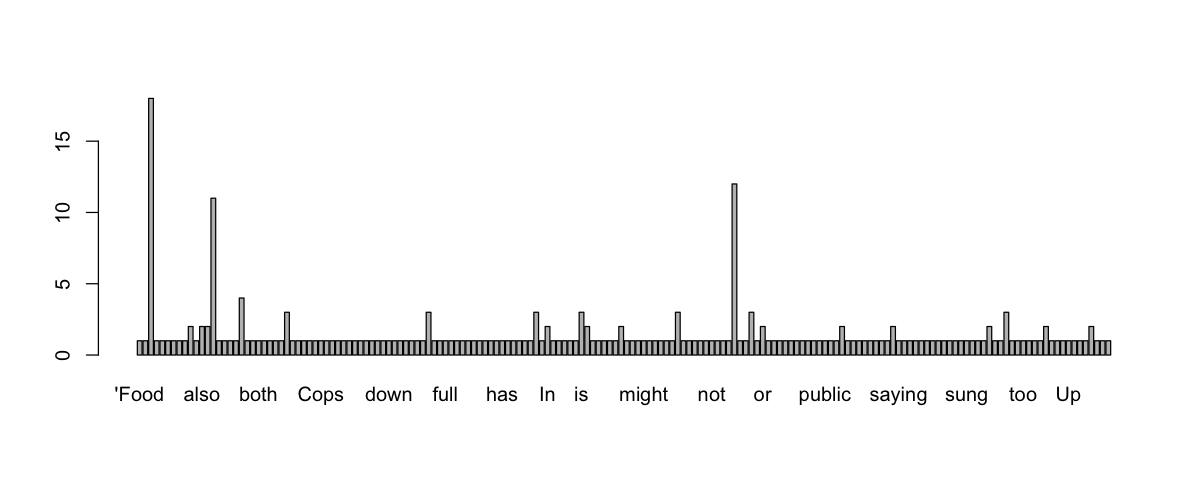

In [73]:
barplot(table(words)) # note: if you stretch the plot window in RStudio you see more/less data

We can also get an overview of the words that are in this text:

In [74]:
print(levels(factor(words)))

  [1] "'Food"         "26"            "a"             "A"            
  [5] "absorbs"       "admiral"       "ado"           "against"      
  [9] "alas"          "all"           "allay"         "also"         
 [13] "an"            "and"           "AngloCanadian" "anxiously"    
 [17] "any"           "around"        "as"            "banking"      
 [21] "Bart's"        "both"          "bought"        "brought"      
 [25] "built"         "But"           "by"            "capitalists"  
 [29] "captains"      "cardinals"     "cocoa"         "common"       
 [33] "Cops"          "corn"          "corporation,"  "corrupt"      
 [37] "country"       "courts"        "crowd"         "cry"          
 [41] "cursing"       "disgusting"    "docks"         "doubts"       
 [45] "down"          "dying"         "farms"         "fish"         
 [49] "folk"          "food!'"        "foodstuffs"    "for"          
 [53] "from"          "front"         "full"          "fuss"         
 [57] "giant"       

We can also do string-specific type things:

In [75]:
number_of_characters = nchar(words)

In [76]:
number_of_characters

[1]  5  2  5  3  4  2  5  9  1  5  2  7  9  3  3  5  2  7  1  4  2  9  1  4  3
 [26]  2 13 11  6  3  4  3  2  1  4  3  7 13  7 12  6  2  3  2  3  3  7  3  5  5
 [51]  2  1  6  6  2  7  7  2  1  6  3  2  5  1  6  2  8  1 10  1  6  9  2  6  4
 [76]  2  6  2  1  5  5  2  6  7 12  3  6  7  9  7  2  2  1 11  5  9  6  4  5  5
[101]  8  6  2  1  6  3 12  4  2  6  6  4  8 11  4  9  9  4  5  3  8  3  7 11  3
[126]  8  2  4  6  4  5  3  2  5  2  5  1  3  6  1  9  2 10  8  3  1  6  4  2 10
[151]  9  4  2  4  4  4  3  5  2  4  1  4  8  2  4  3  2  2  4  7  5  3  5  7  4
[176]  2  3  3  9  7  3  4  2  5  2  9  5  5  2 10  2  1  7  5  8  2  5  2  7  3
[201]  6  4  5  2  1  4  3  1  5  3  8  1  5  7  1 10  9  3  4  2  6  7  2  3  4
[226]  4  4  2  4  7  3  7  5  5  3  5  2  1  7

This gives us numeric data!  Then we can do things like take histograms:

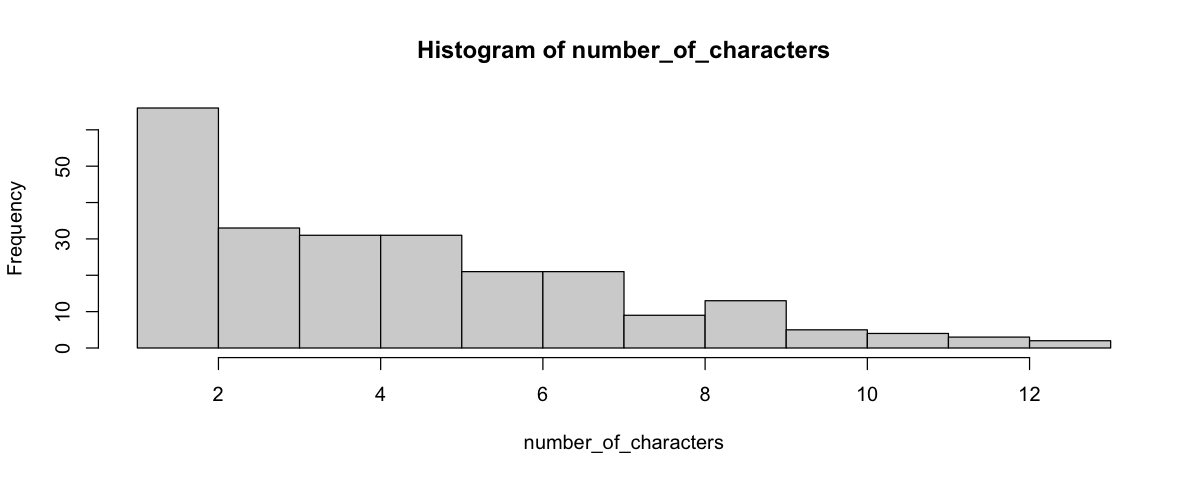

In [77]:
hist(number_of_characters)

**Practice:** What is the skew of this histogram?

And use our nice numerical summary function:

In [78]:
summary(number_of_characters)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   4.000   4.628   6.000  13.000 

So, it looks like, on average, there are ~4 characters per word.

We can make this more granular by counting the specific characters in a word:

In [79]:
countCharOccurrences <- function(char, s) {
  if (length(char) > 1) { # we have a vector (words)
    v = rep(0,length(char))
    for (i in 1:length(char)) {
      s2 <- gsub(char[i],"",s)
      v[i] = (nchar(s) - nchar(s2))
    }
  } else { # other wise, we only have one word
    s2 <- gsub(char,"",s)
    v = (nchar(s) - nchar(s2))
  }
    return (v)
}

In [80]:
countCharOccurrences("a", "hat")

[1] 1

Note it will take any string and count:

In [82]:
countCharOccurrences("a", "cat in the hat")

[1] 2

We can also count over a vector:

In [83]:
countCharOccurrences("a", c("cat","box","hat"))

[1] 1 0 1

Using our vector of words:

In [84]:
num_a = countCharOccurrences("a",words)

In [85]:
num_a

[1] 1 0 1 1 1 0 1 1 1 1 1 2 0 0 0 0 0 1 1 0 0 2 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0
 [38] 3 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 3 0 0 1 1 0
 [75] 0 0 1 0 0 0 2 0 0 1 1 0 0 0 2 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 2 0 0 1 0
[112] 0 1 1 0 2 1 0 1 1 2 1 0 2 1 2 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 2 1 0 1 2 0
[149] 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 2 1 0 0 1 0 0 0 1 1 2 0 1 0 0 1 1
[186] 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 2 1 1 1 1 0 0 1 1 0 0 2
[223] 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1

We can get the total number of a's in the whole text:

In [86]:
total_a = sum(num_a)

And compare that to the number of b's:

In [88]:
num_b = countCharOccurrences("b",words)
total_b = sum(num_b)

In [90]:
print(total_a)
print(total_b)

[1] 131
[1] 17


We can then make a barplot with this:

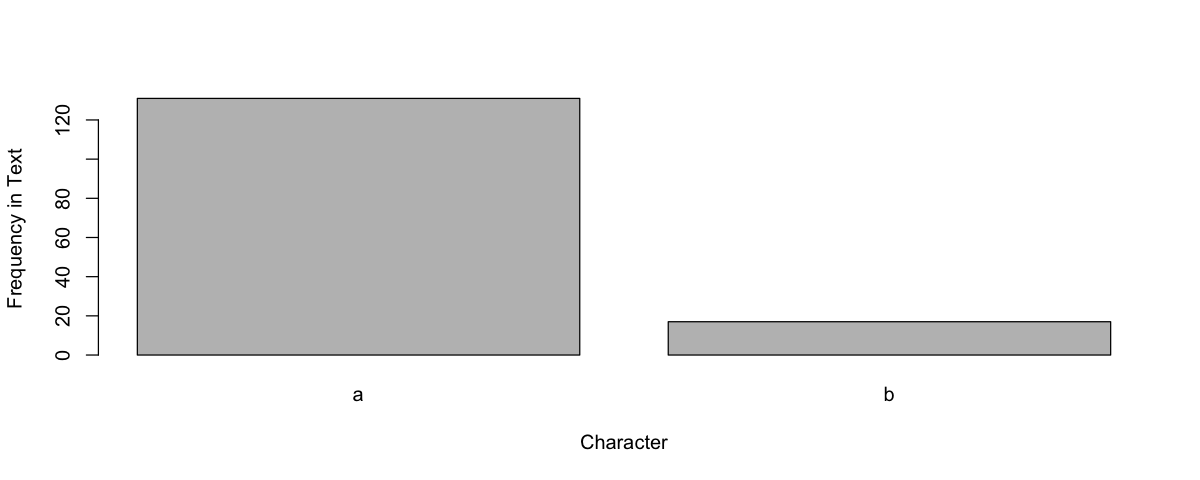

In [91]:
barplot(c(total_a,total_b),names.arg=c("a","b"),xlab="Character",ylab="Frequency in Text")